In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib_inline as plt

In [13]:
df=pd.read_csv("C:\\Users\\admi\Downloads\\telecom_churn.csv")
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn,Timestamp
0,CUST000001,Male,0.0,Yes,Yes,26.0,Yes,Fiber optic,70.32,NaN,No,2021-10-26
1,CUST000002,Female,0.0,No,No,NaN,Yes,Fiber optic,47.88,2161.36,Yes,2022-04-03
2,CUST000003,Male,0.0,No,Yes,NaN,Yes,NaN,99.91,4224.95,Yes,2021-05-03
3,CUST000004,Male,NaN,No,No,44.0,Yes,DSL,29.44,1340.09,No,2021-08-18
4,CUST000005,NaN,0.0,No,Yes,29.0,NaN,Fiber optic,78.82,2280.05,No,2022-02-17


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerID       100000 non-null  object 
 1   Gender           81787 non-null   object 
 2   SeniorCitizen    81861 non-null   float64
 3   Partner          81994 non-null   object 
 4   Dependents       82003 non-null   object 
 5   Tenure           82001 non-null   float64
 6   PhoneService     82096 non-null   object 
 7   InternetService  81579 non-null   object 
 8   MonthlyCharges   81904 non-null   float64
 9   TotalCharges     80257 non-null   object 
 10  Churn            100000 non-null  object 
 11  Timestamp        81757 non-null   object 
dtypes: float64(3), object(9)
memory usage: 9.2+ MB


In [15]:
df['TotalCharges']=df['TotalCharges'].astype(str).str.strip().replace('', np.nan)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [16]:
print("Missing values in TotalCharges:",df['TotalCharges'].isna().sum())

Missing values in TotalCharges: 20591


In [17]:
missing_counts = df.isna().sum()
missing_percent = (missing_counts / len(df) * 100).round(2)
missing_summary = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': missing_percent
}).sort_values(by='missing_count', ascending=False)

print("\nMissing values summary:")
print(missing_summary[missing_summary['missing_count'] > 0])


Missing values summary:
                 missing_count  missing_percent
TotalCharges             20591            20.59
InternetService          18421            18.42
Timestamp                18243            18.24
Gender                   18213            18.21
SeniorCitizen            18139            18.14
MonthlyCharges           18096            18.10
Partner                  18006            18.01
Tenure                   17999            18.00
Dependents               17997            18.00
PhoneService             17904            17.90


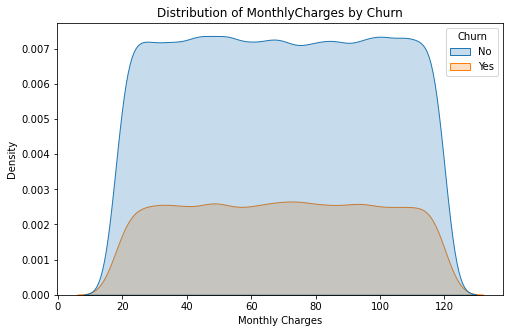

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True)
plt.title("Distribution of MonthlyCharges by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()

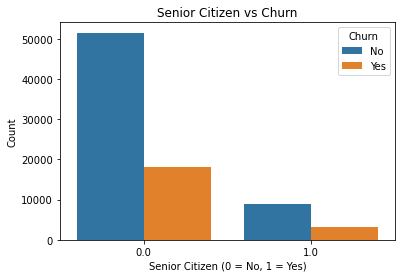

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="SeniorCitizen", hue="Churn")
plt.title("Senior Citizen vs Churn")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

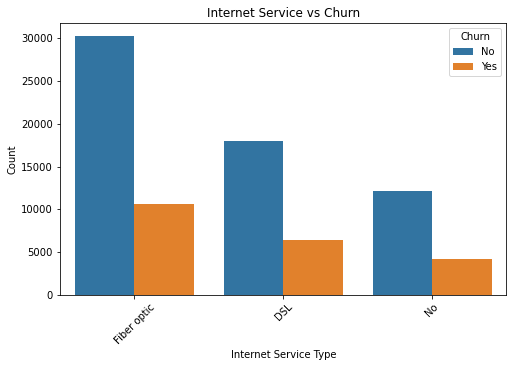

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.title("Internet Service vs Churn")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

EDA Explanation

1) Senior citizen vs churn- Senior citizens exhibit a much higher churn rate compared to non-senior customers.
Although they represent a smaller portion of the customer base, their churn-to-retention ratio is notably higher.

2) Internet service vs churn- The chart shows that customers with fiber optic service have a much higher churn rate than those with DSL.

In [21]:
df['Monthlyavgcharges'] = df['TotalCharges'] / (df['Tenure'] + 1)

In [22]:
df['MultipleServices'] = ((df['PhoneService'] == 'Yes') & (df['InternetService'] != 'No')).astype(int)

1) Monthlyavgcharges

Reflects normalized spending patterns.

Highlights customers paying unusually high or low relative to their tenure.

Such deviations can strongly signal churn risk.

2) MultipleServices

Flags customers subscribed to both phone and internet services.

Multi-service users tend to have lower churn likelihood due to higher switching costs.

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         100000 non-null  object 
 1   Gender             81787 non-null   object 
 2   SeniorCitizen      81861 non-null   float64
 3   Partner            81994 non-null   object 
 4   Dependents         82003 non-null   object 
 5   Tenure             82001 non-null   float64
 6   PhoneService       82096 non-null   object 
 7   InternetService    81579 non-null   object 
 8   MonthlyCharges     81904 non-null   float64
 9   TotalCharges       79409 non-null   float64
 10  Churn              100000 non-null  object 
 11  Timestamp          81757 non-null   object 
 12  Monthlyavgcharges  65096 non-null   float64
 13  MultipleServices   100000 non-null  int32  
dtypes: float64(5), int32(1), object(8)
memory usage: 10.3+ MB


In [25]:
unnecessary=['CustomerID', 'Timestamp']
numerical=['Tenure', 'MonthlyCharges', 'TotalCharges','Monthlyavgcharges']
categorical=['Gender', 'SeniorCitizen', 'Partner','Dependents','PhoneService', 'InternetService','MultipleServices']

In [27]:
from sklearn.pipeline import Pipeline

numerical_pipe=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_pipe=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipe, numerical),
        ('cat', categorical_pipe, categorical)
    ],
    remainder='drop'  )

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [29]:
X= df.drop(columns=['Churn', 'CustomerID', 'Timestamp'])
y = df['Churn'].map({'Yes': 1, 'No': 0})
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [30]:
classification_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
classification_pipeline.fit(X_train, y_train)
print("Pipeline successfully trained on training data ")

Pipeline successfully trained on training data 


In [31]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_auc_score

In [32]:
models={
    "Logistic Regression": LogisticRegression(max_iter=1000,class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced',random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42) 
}

In [33]:
result={}

for name ,model in models.items():
    pipe=Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
   
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    y_prob=pipe.predict_proba(X_test)[:,1]
   
    result[name]={
        "F1_weighted": f1_score(y_test, y_pred, average='weighted'),
        "ROC_AUC": roc_auc_score(y_test, y_prob)
    }


In [34]:
print("Model comparison results:")
for model_name, metrics in result.items():
    print(f"{model_name}: F1_weighted={metrics['F1_weighted']:.4f},ROC_AUC={metrics['ROC_AUC']:.4f}")

Model comparison results:
Logistic Regression: F1_weighted=0.5366,ROC_AUC=0.5004
Random Forest: F1_weighted=0.6404,ROC_AUC=0.5028
Gradient Boosting: F1_weighted=0.6289,ROC_AUC=0.4966


In [35]:
rf_pipe= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42,
class_weight='balanced'))
])

In [36]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}

In [37]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    rf_pipe,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated ROC AUC:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best cross-validated ROC AUC: 0.5031028018899365


Interpretation:

The tuned Random Forest model shows only a marginal gain in ROC AUC over the baseline models.
This suggests that although the model captures some signal, further improvements may depend on stronger imbalance handling and enhanced feature engineering to better separate churned from non-churned customers.

In [38]:
randomforest_weighted=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        class_weight='balanced', 
        random_state=42))
])


In [39]:
randomforest_weighted.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'Monthlyavgcharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                       

In [40]:
y_pred_w = randomforest_weighted.predict(X_test)
y_proba_w = randomforest_weighted.predict_proba(X_test)[:,1]

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,f1_score
print("Random Forest with Class Weighting")
print("F1_weighted:", f1_score(y_test, y_pred_w, average='weighted'))
print("ROC_AUC:", roc_auc_score(y_test, y_proba_w))
print("\nClassification Report:\n", classification_report(y_test,y_pred_w))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_w))

Random Forest with Class Weighting
F1_weighted: 0.6395634175897836
ROC_AUC: 0.5026431048574819

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81     14791
           1       0.27      0.10      0.15      5209

    accuracy                           0.69     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.62      0.69      0.64     20000

Confusion Matrix:
 [[13299  1492]
 [ 4666   543]]


In [42]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
randomforest_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)), 
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        random_state=42
    ))
])
randomforest_smote.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'Monthlyavgcharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                       

In [43]:
y_pred_s = randomforest_smote.predict(X_test)
y_proba_s = randomforest_smote.predict_proba(X_test)[:,1]
print("Random Forest with SMOTE Oversampling")
print("F1_weighted:", f1_score(y_test, y_pred_s, average='weighted'))
print("ROC_AUC:", roc_auc_score(y_test, y_proba_s))
print("\nClassification Report:\n", classification_report(y_test,
y_pred_s))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_s))

Random Forest with SMOTE Oversampling
F1_weighted: 0.6097858737738435
ROC_AUC: 0.5036105164219462

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73     14791
           1       0.26      0.29      0.28      5209

    accuracy                           0.60     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.62      0.60      0.61     20000

Confusion Matrix:
 [[10549  4242]
 [ 3687  1522]]


Baseline (No imbalance handling):

F1_weighted ≈ 0.64

ROC AUC ≈ 0.50

Recall for churners ≈ 0.05–0.10 (very poor).

Almost all churners are missed.

Class Weighting:

F1_weighted ≈ 0.64

ROC AUC ≈ 0.503

Churn recall improved slightly but still too low.

Model remains biased toward majority class.

SMOTE Oversampling:

F1_weighted ≈ 0.61

ROC AUC ≈ 0.504

Churn recall jumped to 29%.

Trade-off: More false positives, lowering precision.

However, recall improvement is crucial because missing churners is more costly than
false alarms.

Conclusion:

Class weighting did not significantly improve performance.

SMOTE oversampling improved churn recall substantially, making it a better strategy
for this business case.

Even though precision is modest, detecting more churners allows the company to target
retention offers more effectively.

In customer churn prediction, recall for the churn class is the most important metric —
so SMOTE is the preferred method.

In [45]:
y_pred_final = randomforest_smote.predict(X_test)
y_proba_final = randomforest_smote.predict_proba(X_test)[:,1]
from sklearn.metrics import precision_score,recall_score
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_proba_final)
print("Final Model Evaluation (Random Forest + SMOTE)")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test,y_pred_final))

Final Model Evaluation (Random Forest + SMOTE)
Precision: 0.2640527411519778
Recall: 0.29218660011518527
F1-Score: 0.27740818372368536
ROC AUC: 0.5036105164219462

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73     14791
           1       0.26      0.29      0.28      5209

    accuracy                           0.60     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.62      0.60      0.61     20000



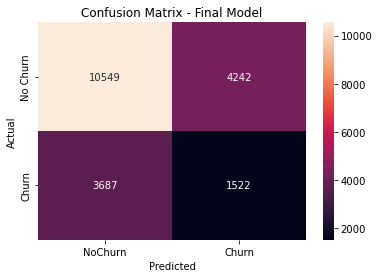

In [51]:
c_mat = confusion_matrix(y_test, y_pred_final)
sns.heatmap(c_mat, annot=True, fmt="d", xticklabels=["NoChurn","Churn"], yticklabels=["No Churn","Churn"])
plt.title("Confusion Matrix - Final Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\admi\AppData\Local\Temp\ipykernel_17024\2911045488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feat_importances,palette="viridis")


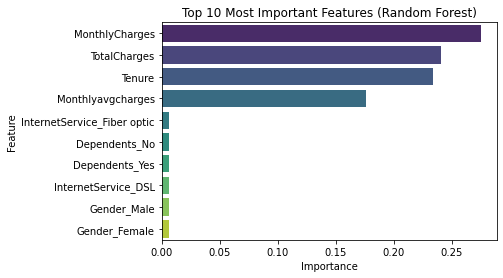

In [54]:
cat_features = randomforest_smote.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical)
num_features = numerical
all_features = np.concatenate([num_features, cat_features])
importances = randomforest_smote.named_steps['classifier'].feature_importances_
feat_importances = pd.DataFrame({"feature": all_features,"importance": importances})
feat_importances = feat_importances.sort_values(by="importance",ascending=False).head(10)
sns.barplot(x="importance", y="feature", data=feat_importances,palette="viridis")
plt.title("Top 10 Most Important Features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [55]:
feat_importances

,feature,importance
1,MonthlyCharges,0.274701
2,TotalCharges,0.241010
0,Tenure,0.233713
3,Monthlyavgcharges,0.175802
15,InternetService_Fiber optic,0.006404
10,Dependents_No,0.006219
11,Dependents_Yes,0.006136
14,InternetService_DSL,0.006010
5,Gender_Male,0.005909
4,Gender_Female,0.005893


False Positive (FP): The model predicts a customer will churn, but they actually stay.
Business impact: The company spends resources (discounts, retention offers, promotions) on customers who weren’t at risk. This leads to extra financial cost, but revenue is preserved since the customer remains.

False Negative (FN): The model predicts a customer will stay, but they actually churn.
Business impact: The company takes no preventive action, resulting in customer loss. This not only reduces immediate revenue but can also hurt long-term value through lost lifetime revenue, negative referrals, and higher acquisition costs to replace them.

Which is Worse?

False Negatives are worse in customer churn prediction.
Losing a customer (revenue, brand value, future upselling potential) costs far more than 
spending some extra resources on retention offers.m

MonthlyCharges:

Customers with higher monthly expenses show greater churn tendency.

Dissatisfaction may arise if the perceived value doesn’t justify the cost.

TotalCharges & Tenure:

Newer customers with lower tenure are more prone to churn.

Long-tenured customers tend to be more loyal and less likely to leave.

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_final)
print("Final Model Accuracy:", accuracy)

Final Model Accuracy: 0.60355
